# IA Paper 4 - Mathematics - Examples paper 4

## Question 7

In an epidemic, there are at any particular time x people not yet infected and y people who are ill. The rate at which people become ill is $\alpha x$, where $\alpha$ is a constant. If x is initially equal to N, find an expression for x at time t. (Regard the numbers of people x and y as continuous variables.) 

The rates of recovery and death of those who are ill are $\beta y$ and $\gamma y$, respectively. If y is initially equal to zero, find an expression for the number of deaths up to time t from the start of the epidemic. (Assume that those who recover are immune from further infection.) 

The expression for the number of deaths appears to be indeterminate if $\alpha = \beta + \gamma$. Find the limiting form of the expression as $\beta + \gamma \rightarrow \alpha$.

Not all differential equations can be solved algebraically: sometimes numerical integration is the only option. Use Python to solve the system of equations numerically, and compare the numerical and exact solutions graphically.

__Python hints__ 
- Start by choosing your $\alpha$, $\beta$, $\gamma$ values and an arbitrary total number of people.  
- Use Euler integration to find the solutions numerically. The Euler method estimates the next value by approximating the solution to be a straight line from the previous point, with gradient equal to the derivative at the original point.  
- The Euler integration method is a first-order method, which means that the local error (error per step) is proportional to the square of the step size, and the global error (error at a given time) is proportional to the step size. If you wish for an extension, try plotting several step size values on the same plot, or plot the average error against the step size to see this relationship.



### Solution

First we import all relevant modules. We will need numpy and matplotlib.pyplot. We also use the command for inline plotting in Jupyter notebooks.

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

# Special command for plotting inside a Jupyter notebook
%matplotlib inline

We define the parameters $\alpha$, $\beta$, $\gamma$ and N for the simulation- experiment with different values.

In [2]:
# Rate of infection (Try numbers close to β + γ as well)
α = 0.5

# Rate of recovory
β = 0.5

# Rate of death
γ = 0.5

# Total population
N = 1000

We define the initial conditions (supplied by the question).

In [3]:
# Number of healthy people intially
x = N

# Number of people who are ill initially
y = 0

# Number of dead people initially
z = 0

# Starting time
t = 0

We set the time parameters - the approximate total time to run over and the step size.

In [4]:
# Maximum time over which to run simulation
tmax = 10

# Interval step size. Look at the effect of changing this.
dt = 0.2

# Number of time points (length of arrays) (includes t = 0)
length = round(((tmax)/dt) + 1)

We initialize arrays of the correct length for the the number of healthy, ill and dead people as well as time, to record the various counts at each time step so we can plot the trajectories later (the first member of the list is the initial condition for that variable, the second member is that variable a time dt later).

In [5]:
# Initialises arrays filled with zeros
X = np.zeros(length)
Y = np.zeros(length)
Z = np.zeros(length)
T = np.zeros(length)

We create the main loop - we iterate over the length of the array corresponding to time steps of `dt` up to `tmax`. This is the integration part - we use the Euler method.

We use the fact that, for example, $x = x + (dx/dt) \Delta t $ to find the x value for the next step, dt further along:

$$ 
x_{i+1} = x_i - \alpha x_i \Delta t \\
y_{i+1} = y_i + \alpha x_i \Delta t - \beta y_i \Delta t - \gamma y_i \Delta t \\
z_{i+1} = z_i + \gamma y_i \Delta t
$$

We we end up with four arrays, `X`, `Y`, `Z` and `T` which contain our time steps and the numerically calculated values for x, y and z.

In [6]:
X[0] = x
Y[0] = y
Z[0] = z
T[0] = 0
for i in range(length-1):
    # Calculate the next value of x, y, z from the current values and gradients
    X[i+1] = X[i] - α*X[i]*dt
    Y[i+1] = Y[i] + α*X[i]*dt - β*Y[i]*dt - γ*Y[i]*dt
    Z[i+1] = Z[i] + γ*Y[i]*dt
    T[i+1] = T[i] + dt

We calculate the exact solution, for comparison.

First we must create the arrays to hold our exact solutions.  We create another time array so we can reduce the step size for the numerical integration without effecting how often we sample the exact solution. We set the intervals to give us an appropriate degree of precision.

In [7]:
# Create a T array with the values at which we calculate the exact solutions
T_exact = np.linspace(0, tmax, 1001)

We then fill the arrays with the exact values at each time value, from our equations as calculated in the question:   

$$
x = Ne^{-\alpha t}\\ 
y = \frac{\alpha N}{\beta + \gamma - \alpha} \big(e^{-\alpha t} - e^{-(\beta +\gamma)t}\big)\\
z = \frac{\alpha \gamma N}{\beta + \gamma - \alpha}  \Big( \frac{1-e^{-\alpha t}}{\alpha} - \frac{1- e^{-(\beta +\gamma )t}}{\beta +\gamma} \Big)
$$

In [8]:
# Calculate the exact values
X_exact = (N*np.exp(-α*T_exact))
Y_exact = ((α*N)/(β + γ - α)*(np.exp(-α * T_exact) - np.exp(-(β + γ)*T_exact)))
Z_exact = ((α*γ*N)/(β + γ - α)*((1 - np.exp(-α*T_exact))/α - (1 - np.exp(-(β + γ)*T_exact))/(β + γ)))

We finally plot the numerical solutions on the same axes as the exact solutions.

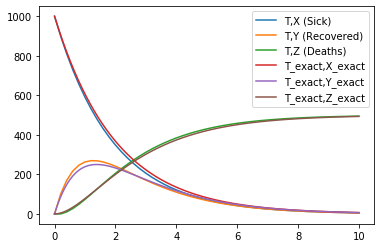

In [13]:
#plt.plot(T,X,T,Y,T,Z,T_exact,X_exact,T_exact,Y_exact,T_exact,Z_exact);
plt.plot(T,X, label="T,X (Sick)");
plt.plot(T,Y, label="T,Y (Recovered)");
plt.plot(T,Z, label="T,Z (Deaths)");
plt.plot(T_exact,X_exact, label="T_exact,X_exact");
plt.plot(T_exact,Y_exact, label="T_exact,Y_exact");
plt.plot(T_exact,Z_exact, label="T_exact,Z_exact");
plt.legend()
plt.show()